In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
from sklearn import metrics

In [0]:
import statsmodels.api as sm

In [0]:
# シグモイド（ロジスティクス）関数
def logistic(t):
  return 1.0/(1+math.exp(-1.0*t))

In [0]:
t = np.linspace(-6,6,500)

In [0]:
y = np.array([logistic(ele) for ele in t])

Text(0.5, 1.0, 'Logisitic Function')

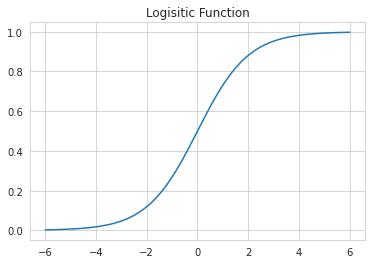

In [8]:
plt.plot(t, y)
plt.title('Logisitic Function')

In [0]:
df = sm.datasets.fair.load_pandas().data

In [10]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [0]:
def affair_check(x):
  if x != 0:
    return 1
  else:
    return 0

In [0]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [13]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [14]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


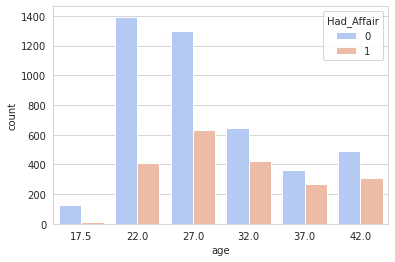

In [15]:
# 年齢別の集計
sns.countplot('age', data=df.sort_values('age'), hue='Had_Affair', palette='coolwarm')

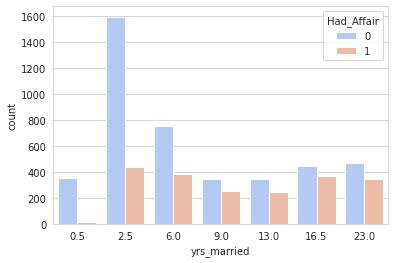

In [16]:
# 結婚年数別の集計
sns.countplot('yrs_married', data=df.sort_values('yrs_married'), hue='Had_Affair', palette='coolwarm')

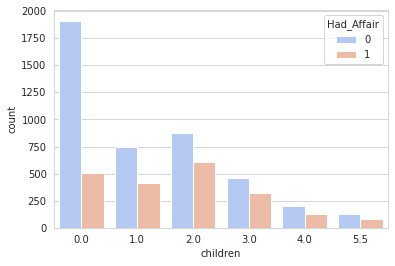

In [17]:
# 子供の数別の集計
sns.countplot('children', data=df.sort_values('children'), hue='Had_Affair', palette='coolwarm')

In [0]:
occ_dummies = pd.get_dummies(df.occupation)

In [0]:
hus_occ_dummies = pd.get_dummies(df.occupation_husb)

In [20]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [0]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [0]:
X = df.drop(['occupation', 'occupation_husb', 'Had_Affair'], axis=1)

In [0]:
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis=1)

In [0]:
X = pd.concat([X, dummies], axis=1)

In [25]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [0]:
Y = df.Had_Affair

In [27]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [0]:
X = X.drop('occ1', axis=1)

In [0]:
X = X.drop('hocc1', axis=1)

In [0]:
X = X.drop('affairs', axis=1)

In [31]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [0]:
Y = np.ravel(Y)